# Lab 3 due 9/12/2018

For this lab, we needed to count the number of times each word appears in romeoandjuliet.txt.  To do this, I need to extract all words in the text file and then sort them into a dictionary of unique words.  The dictionary's keys would be the unique words and the values would be the number of times the word is in the text file.

In order to extract the words from the text file, I need to:
-Translate all punctuation (minus apostrophes) that separate words in the document into white space.  I am including words that include 
apostrophes as their own word, i.e. "don't".
-Split the resulting text file into words, using white space as a delimiter.
-Add these words *lowercased* to a list of words.
-Iterate through the list of all words and count how many times each word appears.
-Add the word and count to a dictionary.

Stored 'distinctwords' (dict)


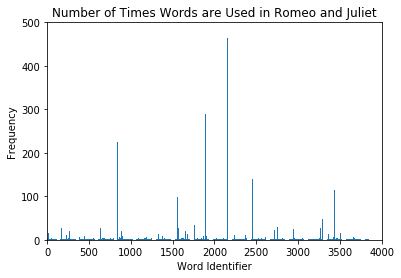

In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import string
from string import maketrans

#translating all punctuation (excluding apostrophe's) in the text to spaces
infile = open("romeoandjuliet.txt")
intab = ",:;.-?!][)("
outtab = "           "
table = maketrans(intab, outtab) #maketrans creates a translation table

#alltext words is list of all the words used in the text in the order they appear
alltextwords = []
for line in infile:
    #Using the translate function and the table above maketrans
    line = line.translate(table)
    #separating the words using spaces and putting then into list words
    words = line.split()
    for word in words:
        #making each word lowercase to be able to count disctinct words, a not case sensitive list
        word = word.lower() 
        alltextwords.append(word) #list of words that appear in text

#need to make a dictionary of distinct words in the text, with number of 
#times that words is used as the value.
distinctwords = {}

for word in alltextwords:
    wordnum = alltextwords.count(word)
    if word not in distinctwords.keys():
        distinctwords[word]=wordnum;
%store distinctwords        

plt.bar(height = distinctwords.values(), x = range(len(distinctwords.values())))
#plt.xticks(range(len(distinctwords.values())), list(distinctwords.keys()))
plt.axis([0,4000,0,500])
plt.title("Number of Times Words are Used in Romeo and Juliet")
plt.ylabel("Frequency")
plt.xlabel("Word Identifier")
plt.show()

In the plot above, each word represent a unique word.  The plot above is used to show the distribution of word frequency rather than the actual words and their word count.

Using the dictionary above, I can make a list of word counts and sort it in ascendinding order.

To find the 10 most used words, I can take the last 10 values in the list and find the corresponding words.

To find the 10 least used words, I can take the first 10 values in the list and find the corresponding words.  
*As there are more than 10 words that have the lowest values in the list, 1, I took only the first 10 words in the dictionary with this value.


In [18]:
listValues = sorted(distinctwords.values())

top10Values = listValues[-10:]
top10Words=[]
for key, value in distinctwords.items():
    if value in top10Values:
        top10Words.append(key)
print("top words:")
print(top10Words)

bottom10Values = listValues[:10]
bottom10Words=[]
for key, value in distinctwords.items():
    if (value in bottom10Values and len(bottom10Words) <= 9):
        bottom10Words.append(key)
print("bottom words:")
print(bottom10Words)

top words:
['my', 'is', 'in', 'the', 'that', 'and', 'of', 'to', 'a', 'i']
bottom words:
['gossamer', 'ladybird', 'demand', 'needful', 'blisters', 'hanging', 'appetite', 'captain', 'clasps', 'swan']


These top 10 and bottom 10 words show that mostly pronouns and prepositions are used frequently in this text.  The bottom 10 words are mostly nouns and are not literal ones used in the text.

I can then sort the dictionary by values in reverse order and plot them in a bar graph.  The x-axis represents the rank (from most used to least used).  Both axes are formatted to log scales.

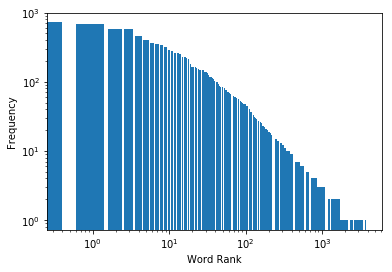

In [40]:
from collections import OrderedDict
orderDW = OrderedDict(sorted(distinctwords.items(), key=lambda t: t[1], reverse= True))
line_out = plt.bar(height = orderDW.values(), x = range(len(listValues)))
plt.xlabel("Word Rank")
plt.ylabel("Frequency")
plt.yscale('log')
plt.xscale('log')

This plot shows that there are more words used at a lower frequency than are used at a higher one.  There is a big diversity of words used in the text file.